In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data visualization

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [15]:
a = df.Category.unique()
len(a), a

(25,
 array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
        'Mechanical Engineer', 'Sales', 'Health and fitness',
        'Civil Engineer', 'Java Developer', 'Business Analyst',
        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
        'Operations Manager', 'Python Developer', 'DevOps Engineer',
        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
       dtype=object))

C:\Users\PC\AppData\Local\Temp\ipykernel_17040\3999743546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Category", data=df, palette = palette)


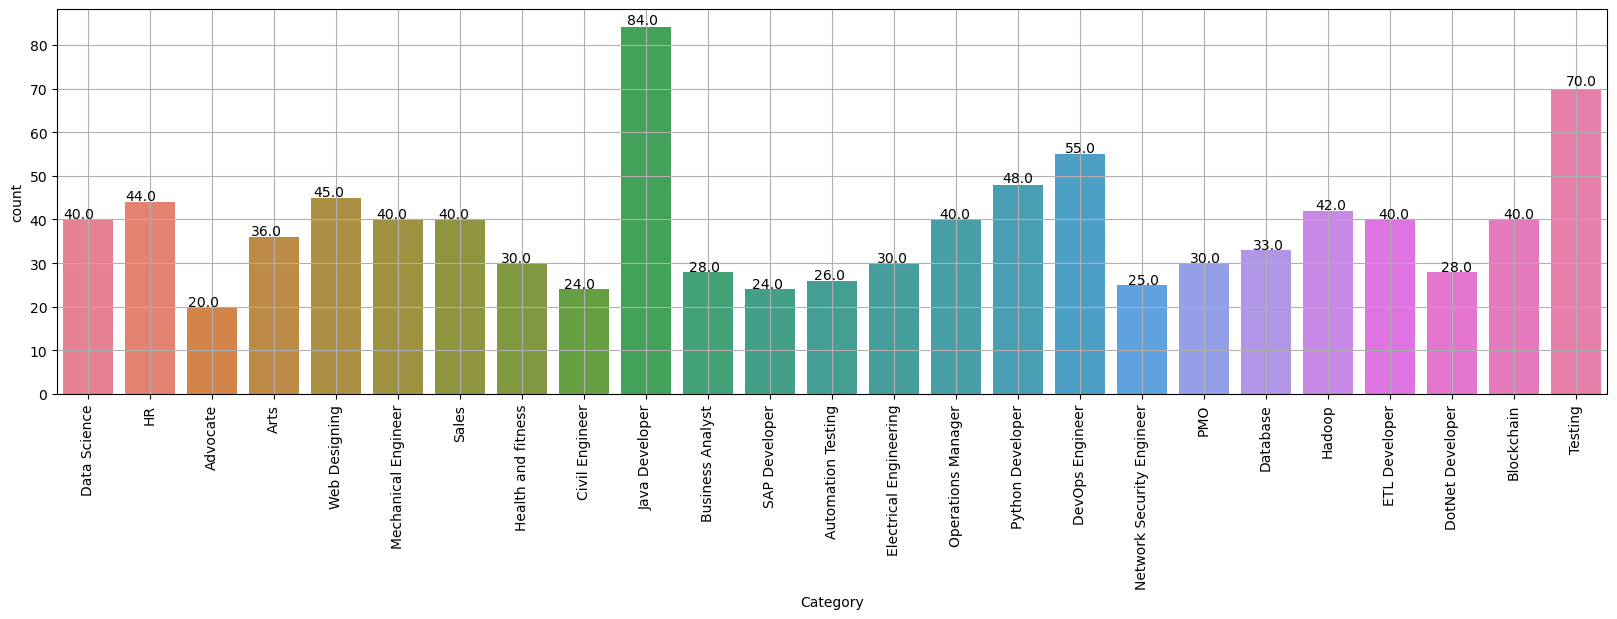

In [21]:
import itertools
palette = sns.color_palette("husl",25)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df, palette = palette)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


## Data cleaning

In [22]:
# check for duplications
df.duplicated(subset=['Resume']).value_counts()

True     796
False    166
Name: count, dtype: int64

In [23]:
# remove duplicate resumes
df.drop_duplicates(subset=['Resume'], keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  166 non-null    object
 1   Resume    166 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [27]:
import re
def clean_resume(resume: str) -> str:
    # remove URLs
    cleaned_text = re.sub(r'http\S+\s*', ' ', resume) 
    # remove RT and cc 
    cleaned_text = re.sub(r'RT|cc', ' ', cleaned_text) 
    # remove hashtags 
    cleaned_text = re.sub(r'#\S+', '', cleaned_text) 
    # remove mentions 
    cleaned_text = re.sub(r'@\S+', '  ', cleaned_text)  
    # remove punctuations
    cleaned_text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)  
    cleaned_text = re.sub(r'[^\x00-\x7f]',' ', cleaned_text) 
    # remove extra whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text) 

    return cleaned_text
df.Resume = df.Resume.apply(lambda resume: clean_resume(resume))

<>:12: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\]'
C:\Users\PC\AppData\Local\Temp\ipykernel_17040\630188750.py:12: SyntaxWarning: invalid escape sequence '\]'
  cleaned_text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)


In [28]:
df.Resume[0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [32]:
from collections import Counter 
count = Counter()
for resume in df.Resume.values:
    for word in resume.split():
        count[word] +=1
most_common_words = count.most_common(15)
most_common_words

[('and', 2663),
 ('the', 1589),
 ('of', 1383),
 ('to', 1179),
 ('in', 853),
 ('for', 793),
 ('Exprience', 616),
 ('with', 573),
 ('company', 520),
 ('months', 515),
 ('Details', 510),
 ('on', 464),
 ('description', 458),
 ('a', 449),
 ('as', 351)]

In [33]:
most_common_words_set = set()
for item in most_common_words:
    most_common_words_set.add(item[0])
most_common_words_set

{'Details',
 'Exprience',
 'a',
 'and',
 'as',
 'company',
 'description',
 'for',
 'in',
 'months',
 'of',
 'on',
 'the',
 'to',
 'with'}

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

user_stopwords = set(stopwords.words('english')+['``',"''"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
user_stopwords.union(most_common_words_set)


{"''",
 'Details',
 'Exprience',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'company',
 'couldn',
 "couldn't",
 'd',
 'description',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'months',
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

input = df.Resume.values
target = df.Category.values

# preprocess category datatype
lab = preprocessing.LabelEncoder()
target = lab.fit_transform(target)

# vectorization
vect = TfidfVectorizer(stop_words=list(user_stopwords))
input = vect.fit_transform(input)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)
print("Size of x_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (132, 7451)
Size of y_train:  (132,)
Size of x_test:  (34, 7451)
Size of y_test:  (34,)


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.83
Accuracy of KNeighbors Classifier on test set:     0.79
